Load and Explore the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("diabetes.csv")  

# Show the first 5 rows
print(df.head())

# Basic info
print(df.info())

# Summary statistics
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

Exploratory Data Analysis (EDA)

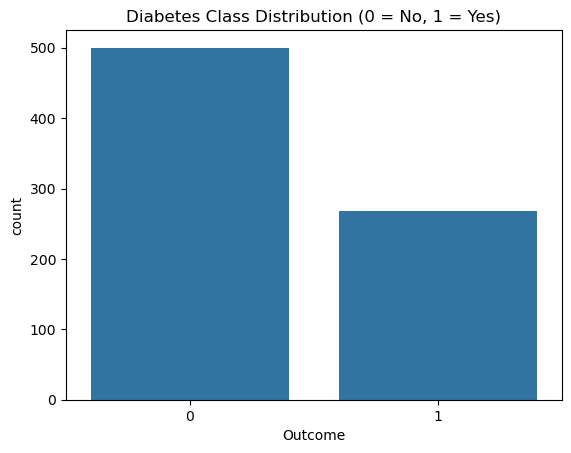

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Class distribution
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Class Distribution (0 = No, 1 = Yes)")
plt.show()


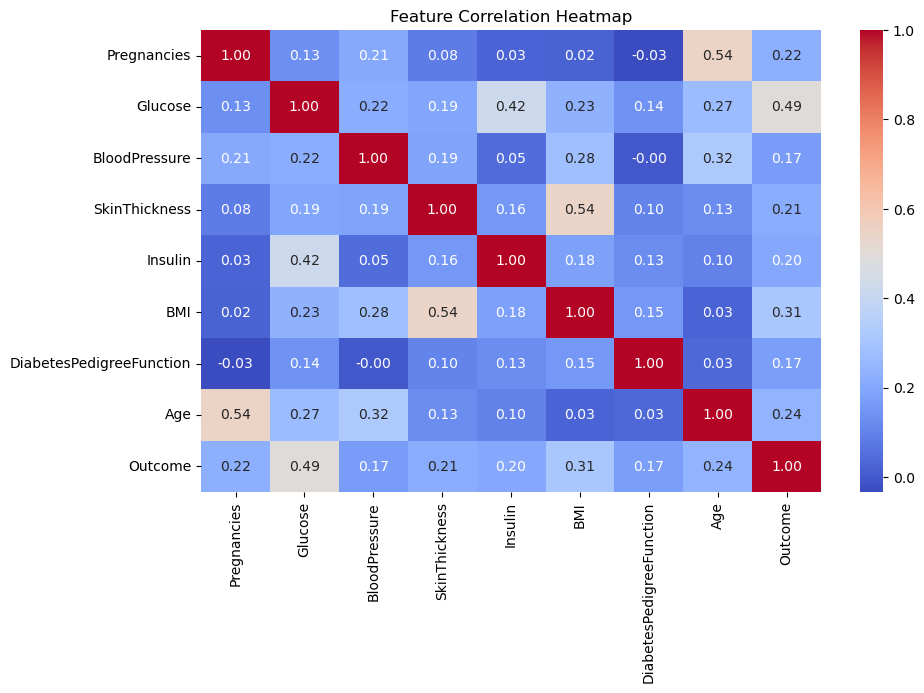

In [29]:
# 2. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

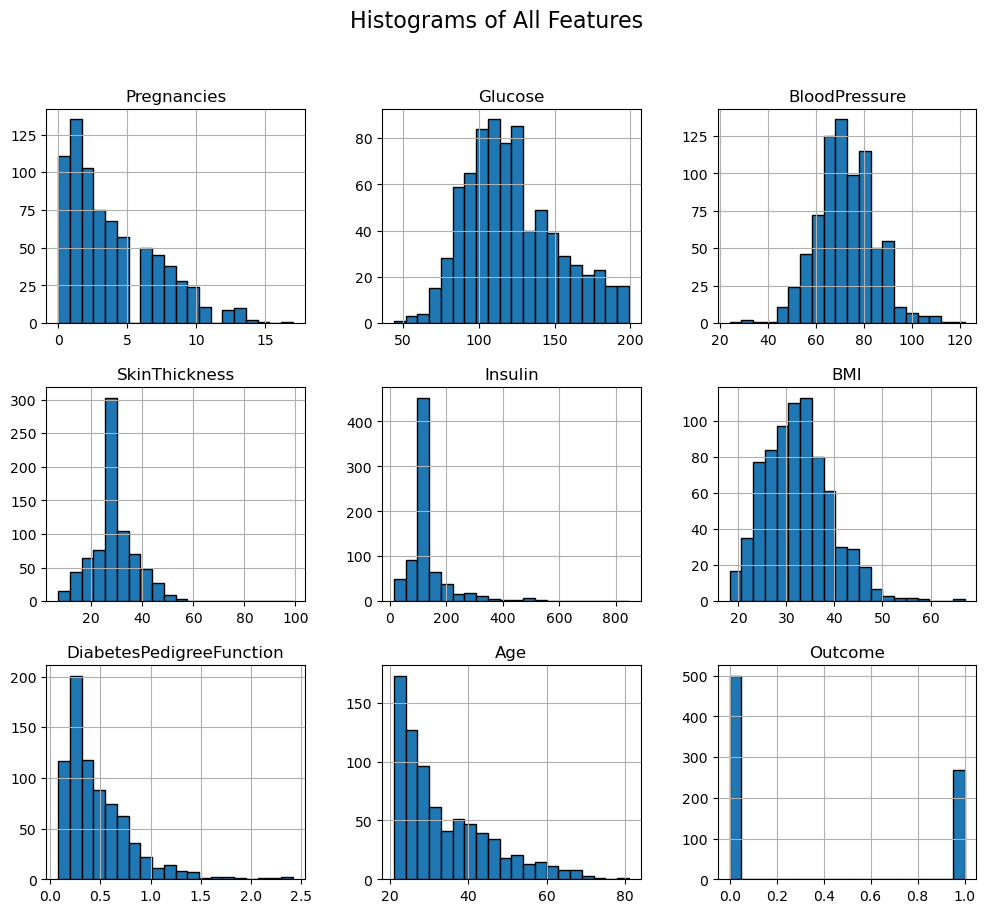

In [31]:
# 3. Histograms of numeric features
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.show()

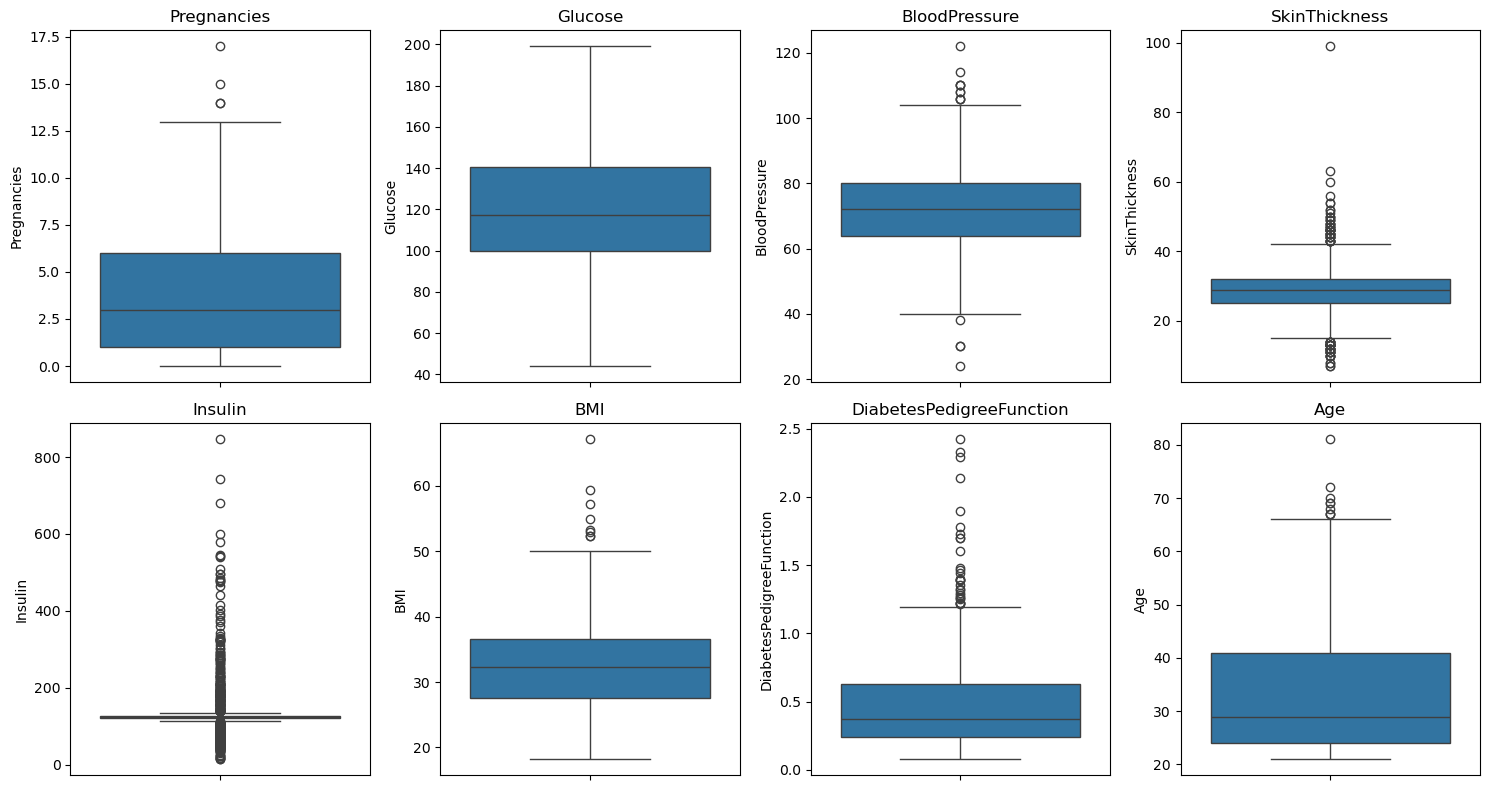

In [33]:
# 4. Boxplots for outlier detection
plt.figure(figsize=(15, 8))
for i, column in enumerate(df.columns[:-1], 1):  # skip 'Outcome'
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, y=column)
    plt.title(column)
plt.tight_layout()
plt.show()

Data Cleaning: Handling Missing or Zero Values

In [3]:
import numpy as np

# Replace zeroes with NaN (only in relevant columns)
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Now fill NaNs with median values of each column
df[cols_with_zeros] = df[cols_with_zeros].fillna(df[cols_with_zeros].median())


Data Splitting and Feature Scaling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train and Evaluate Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7532467532467533

Confusion Matrix:
 [[82 17]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



Make Prediction for a New Patient

In [27]:
import pandas as pd

# 1. Create new patient input with the same features and order
new_patient_df = pd.DataFrame([[
    2,       # Pregnancies
    130,     # Glucose
    70,      # BloodPressure
    28,      # SkinThickness
    125,     # Insulin
    32.5,    # BMI
    0.5,     # DiabetesPedigreeFunction
    40       # Age
]], columns=X.columns)

# 2. Scale the input using the previously fitted scaler
new_patient_scaled = scaler.transform(new_patient_df)

# 3. Predict using the trained Logistic Regression model
prediction = log_reg.predict(new_patient_scaled)
probability = log_reg.predict_proba(new_patient_scaled)

# 4. Output the results
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")


Prediction: Not Diabetic


ROC-AUC Score: 0.8228


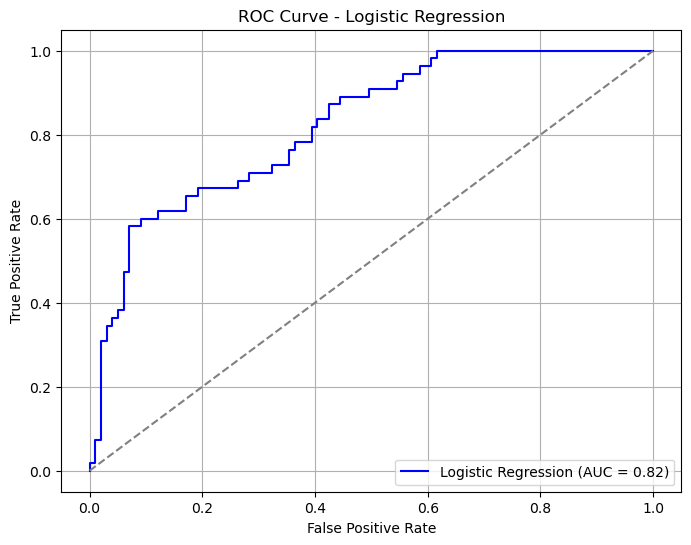

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probabilities for the positive class (class 1 = diabetic)
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Generate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (no-skill classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
